In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Load the csv file 
file_path = 'Retail_sales.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


CLEANING THE DATA

In [5]:
#Convert the 'Date' column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Checking for missing values
df.isnull().sum()

Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64

ANALYZING KEY METRICS

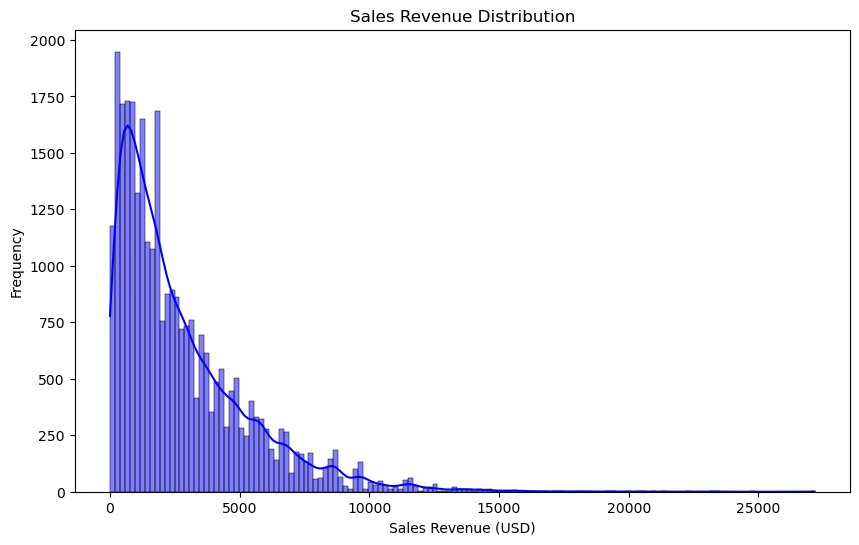

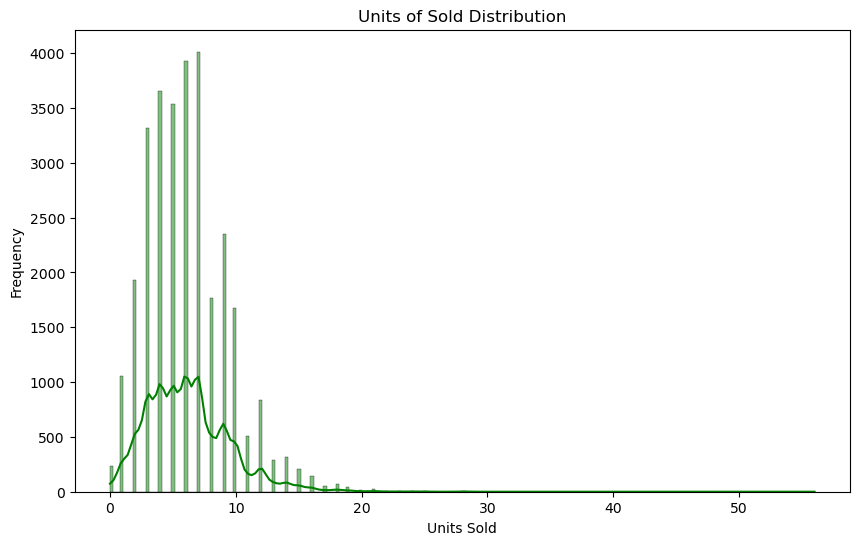

In [7]:
# Plot distribution of sales revenue
plt.figure(figsize=(10,6))
sns.histplot(df['Sales Revenue (USD)'], kde=True, color='blue')
plt.title('Sales Revenue Distribution')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

#Plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(df['Units Sold'], kde=True, color='green')
plt.title('Units of Sold Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

## Sales Revenue Distribution: ##

The first chart tells the story of how your sales revenue is distributed across your customer base. What we see is that the majority of your sales are concentrated at the lower revenue range, between $0 and $5,000. This suggests that a large portion of your transactions come from smaller-value purchases. However, as we move to higher revenue ranges, the frequency of sales drops significantly, meaning high-value transactions are much less common. The sharp decline after the peak further emphasizes that while smaller sales are frequent, higher revenue orders, though they exist, are rare. This type of distribution is typical for businesses catering to a broad base of customers, where most transactions are for lower-priced items, with occasional large purchases driving up overall sales.

## Units Sold Distribution: ##

In the second chart, we’re looking at how many units are sold per transaction. Similar to revenue, the data shows that most of your sales are for fewer than 10 units per transaction, with a large peak around 3 to 5 units sold. This tells us that your customers are typically purchasing only a handful of items at a time. Beyond 10 units per sale, the frequency drops rapidly, suggesting that bulk orders or large-scale purchases are uncommon. This distribution helps in understanding customer buying behavior — they’re more likely to make smaller, frequent purchases rather than large, one-time buys. Knowing this can help tailor your marketing or sales strategy to incentivize larger purchases or reward bulk orders.

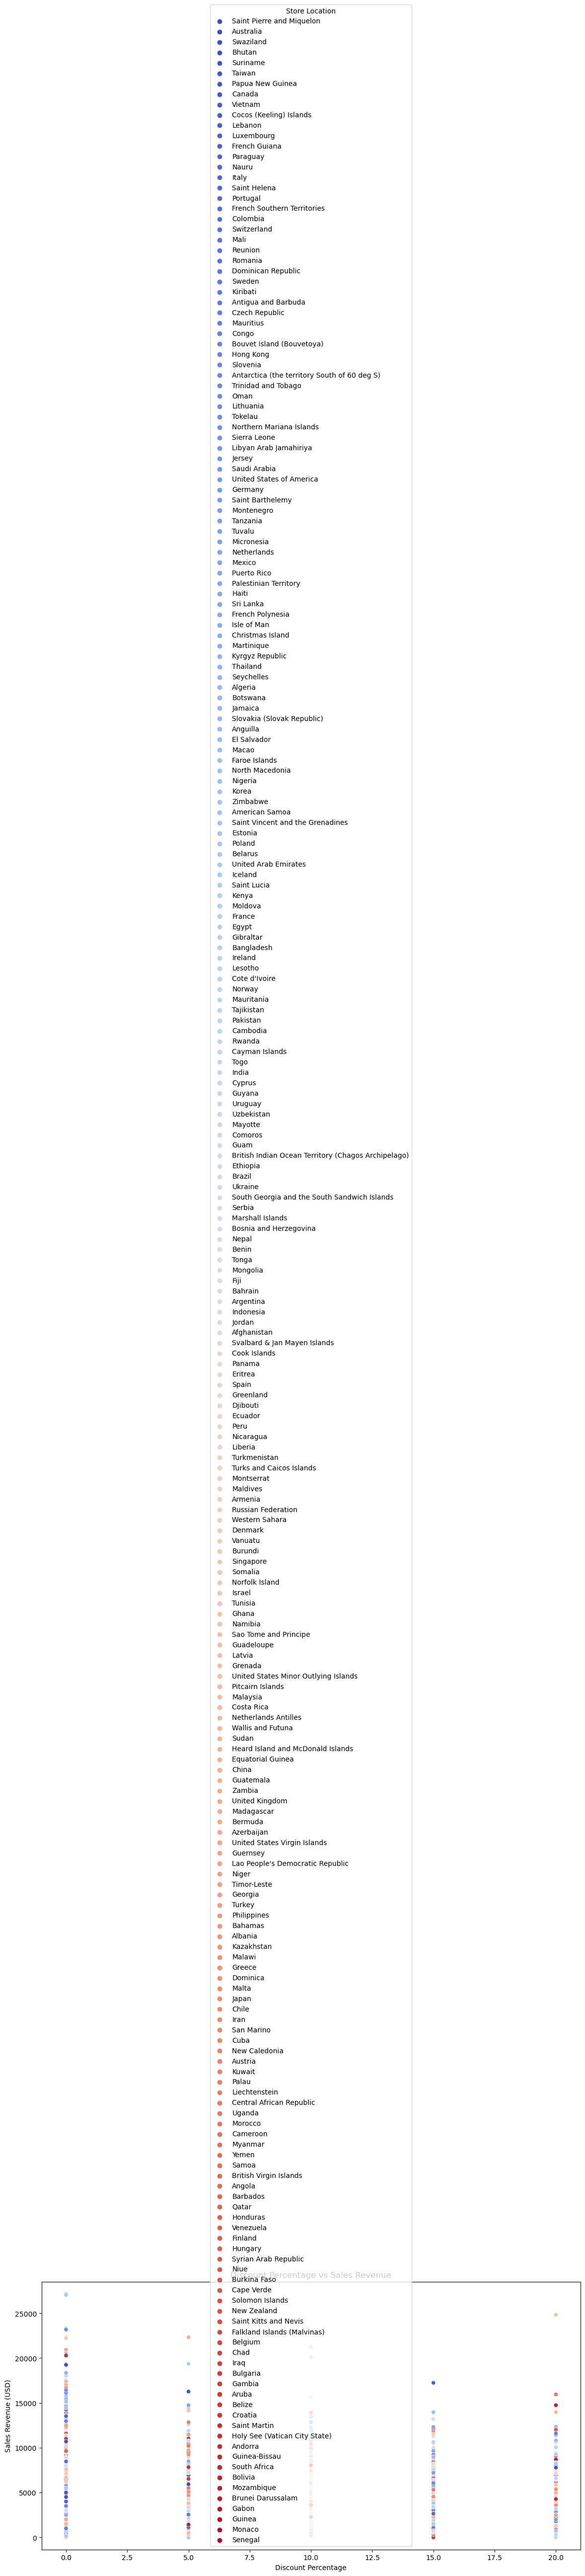

In [22]:
# Plot relationshi[ between Discount Percentage and Sales Revenue
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='Discount Percentage', y ="Sales Revenue (USD)", hue='Store Location', palette='coolwarm')
plt.title('Discount Percentage vs Sales Revenue')
plt.xlabel('Discount Percentage')
plt.ylabel('Sales Revenue (USD)')
plt.show()

## Discount Percentage vs. Sales Revenue Across Store Locations: ##

The above plot offers an in-depth look at how discount strategies impact your sales across different store locations. Each dot on the plot represents a sale, with its position showing the discount offered and the revenue generated. What stands out is that sales with low or no discounts tend to generate a wide range of revenues — some very high, others more modest. However, as discount percentages increase, we see a concentration of sales with lower revenue, suggesting that higher discounts don’t necessarily lead to high revenue sales.

Additionally, the chart breaks down these insights across various store locations, showing how different regions apply discounts and how customers respond. For example, some stores might generate high revenue even with minimal discounts, while others rely more on offering discounts to boost sales. This visualization gives you actionable insights into which discount strategies work best in different locations, helping you refine your promotions and tailor them to specific markets.

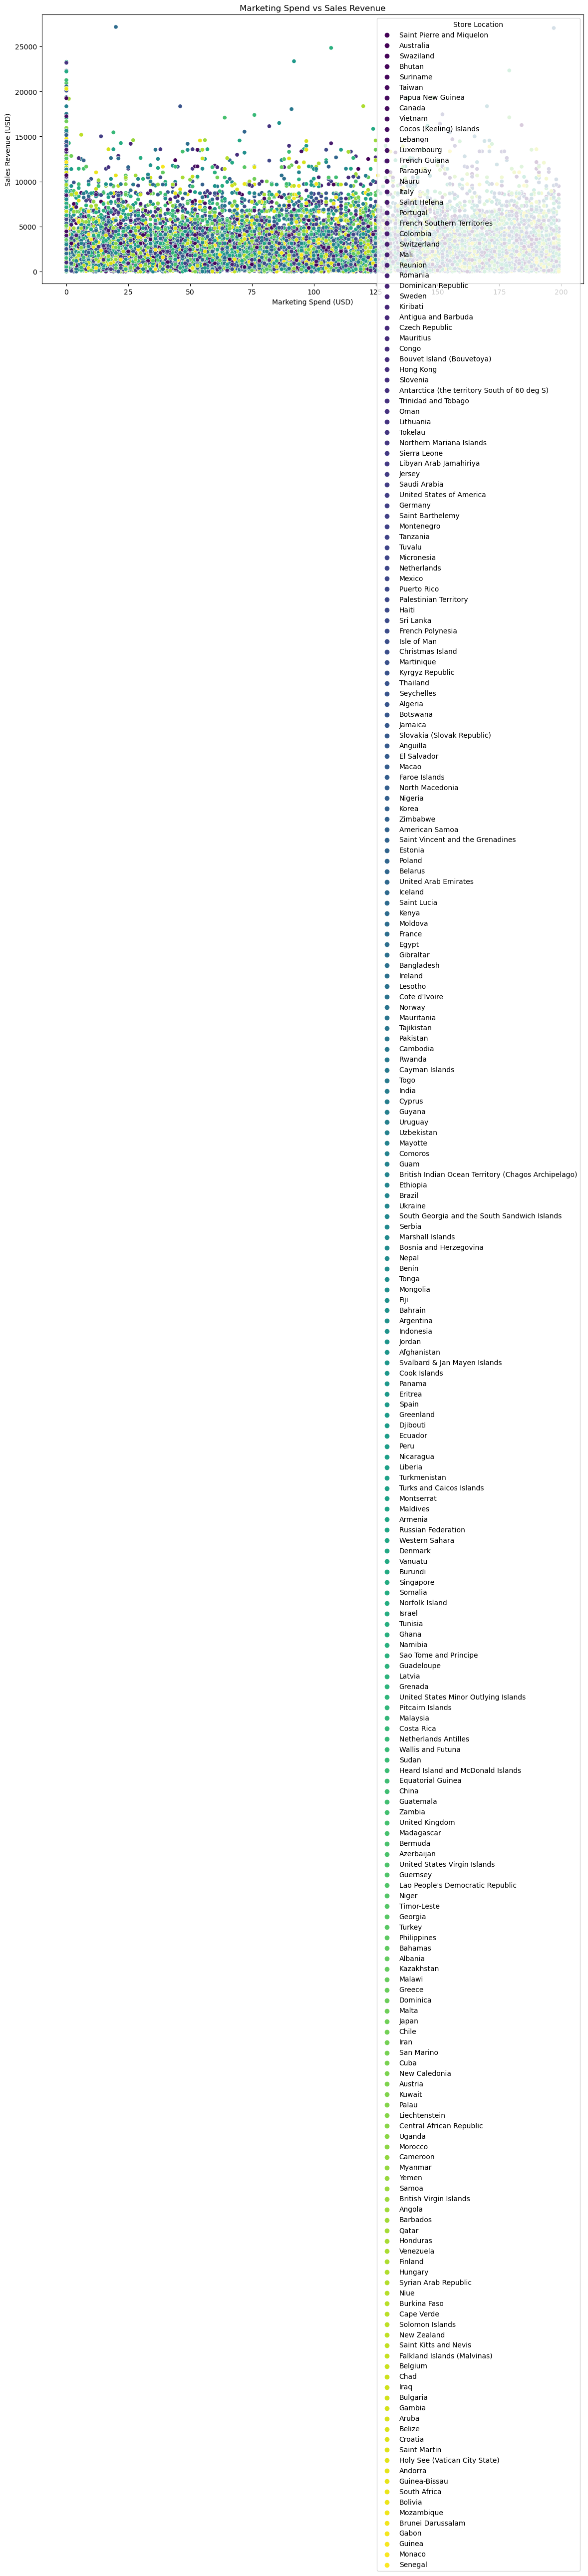

In [19]:
# Plot relationship between Marketing Spend and Sales Revenue
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='Marketing Spend (USD)', y='Sales Revenue (USD)', hue='Store Location', palette='viridis')
plt.title('Marketing Spend vs Sales Revenue')
plt.xlabel('Marketing Spend (USD)')
plt.ylabel('Sales Revenue (USD)')
plt.show()


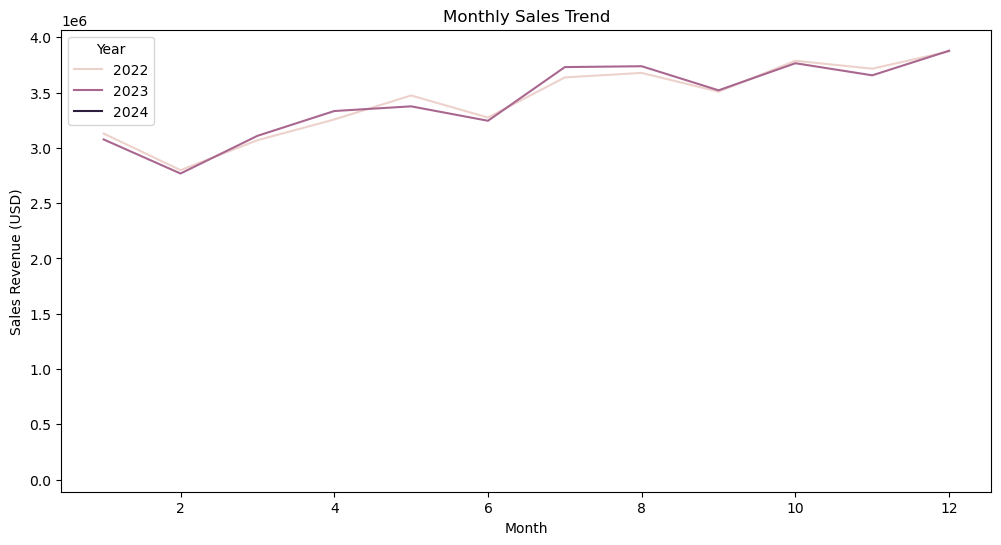

In [10]:
# Adding 'Month' and 'Year" columns to analyze trends
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and year to check overall trend
monthly_sales = df.groupby(['Year', 'Month'])['Sales Revenue (USD)'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales Revenue (USD)', hue='Year', markers='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Revenue (USD)')
plt.show()

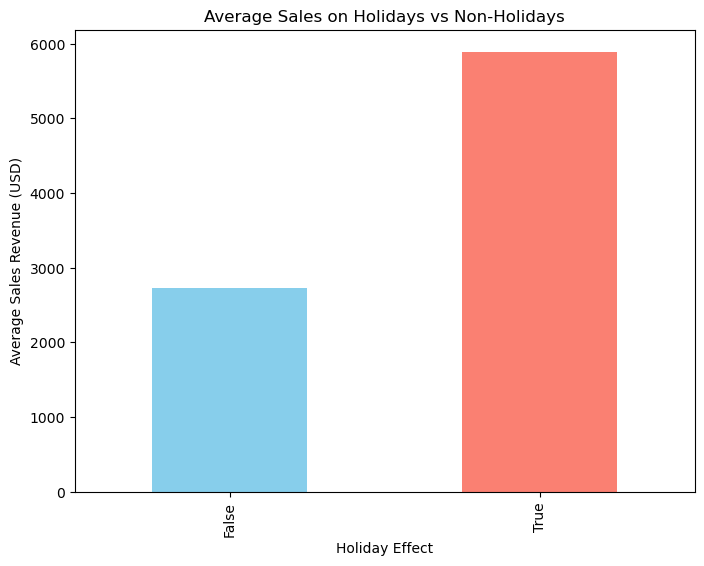

In [11]:
# Analysis on the impact od the holidays on sales
holiday_sales = df.groupby('Holiday Effect')['Sales Revenue (USD)'].mean()

# Plot holiday vs non-holiday sales
holiday_sales.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title('Average Sales on Holidays vs Non-Holidays')
plt.xlabel('Holiday Effect')
plt.ylabel('Average Sales Revenue (USD)')
plt.show()

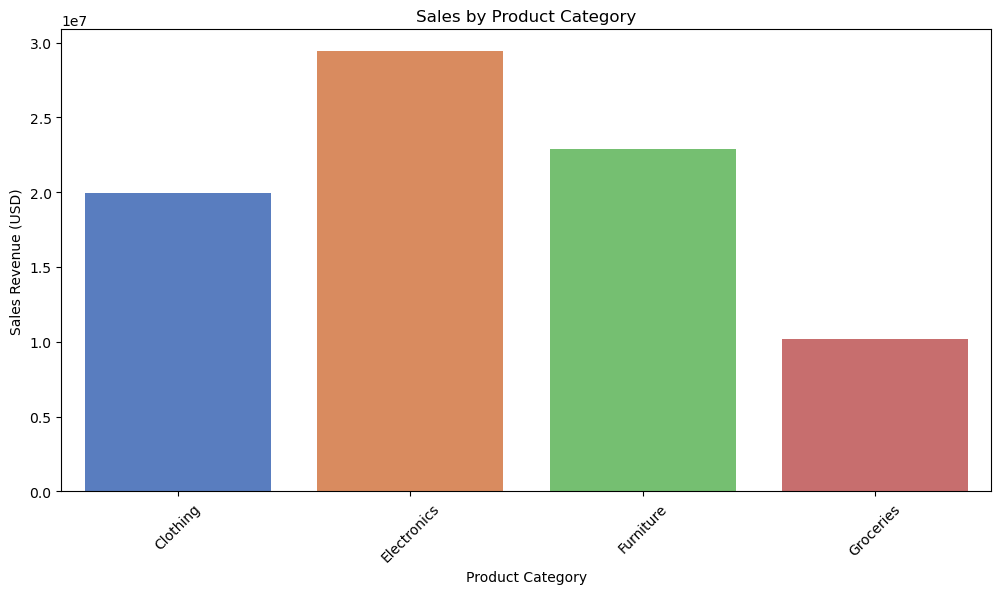

In [12]:
# Group sales by product category
category_sales = df.groupby('Product Category')['Sales Revenue (USD)'].sum().reset_index()

# Plot sales by product category
plt.figure(figsize=(12,6))
sns.barplot(data=category_sales, x='Product Category', y='Sales Revenue (USD)', palette='muted')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

## Clustering stores Based on Performance ##

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant columns
cluster_data = df[['Sales Revenue (USD)', 'Units Sold', 'Marketing Spend (USD)']]

# Standardizing the features
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters = 3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_data_scaled)


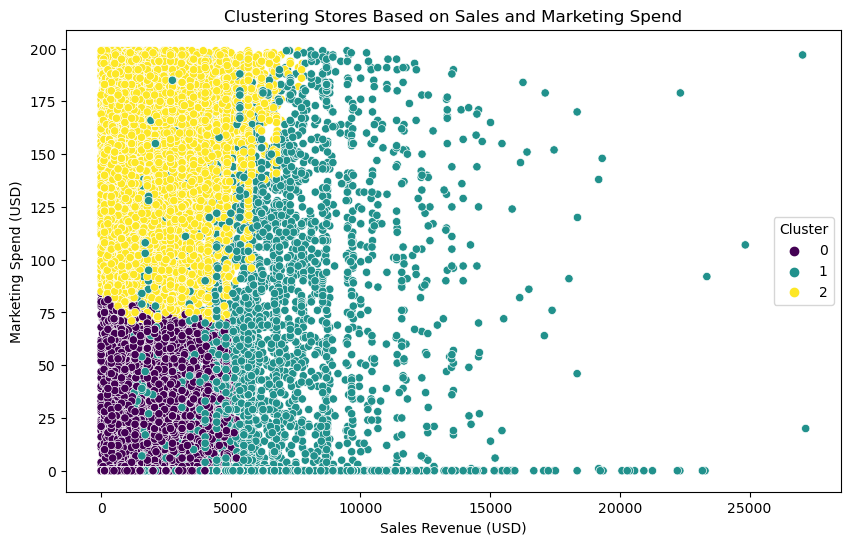

In [14]:
# Visualising the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales Revenue (USD)', y='Marketing Spend (USD)', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering Stores Based on Sales and Marketing Spend')
plt.show()

This chart shows how your stores are grouped based on **sales revenue** and **marketing spend** using clustering analysis.

- **Cluster 0 (Purple)**: Low spend, low sales. These stores are spending under $75 on marketing and seeing less than $5,000 in sales. They may be under-investing or very cost-efficient, but growth potential looks limited.
  
- **Cluster 1 (Teal)**: Mixed results. These stores have varied marketing budgets but inconsistent sales returns. They range across all spending levels, from minimal to heavy investments, but don’t show a clear increase in sales with higher spend. Some marketing efforts here may need optimization.
  
- **Cluster 2 (Yellow)**: High spend, low sales. These stores are spending a lot on marketing (over $75) but only pulling in modest sales (under $5,000). This suggests wasted marketing dollars or ineffective campaigns.

Key takeaway: We have stores with marketing spend that doesn’t always align with sales performance. Some stores need adjustments to get better returns on their marketing investment.

 ## Regression Analysis to Predict Sales Revenue

Mean Squared Error: 4136870.3837183276
R-squared: 0.3835221774107662


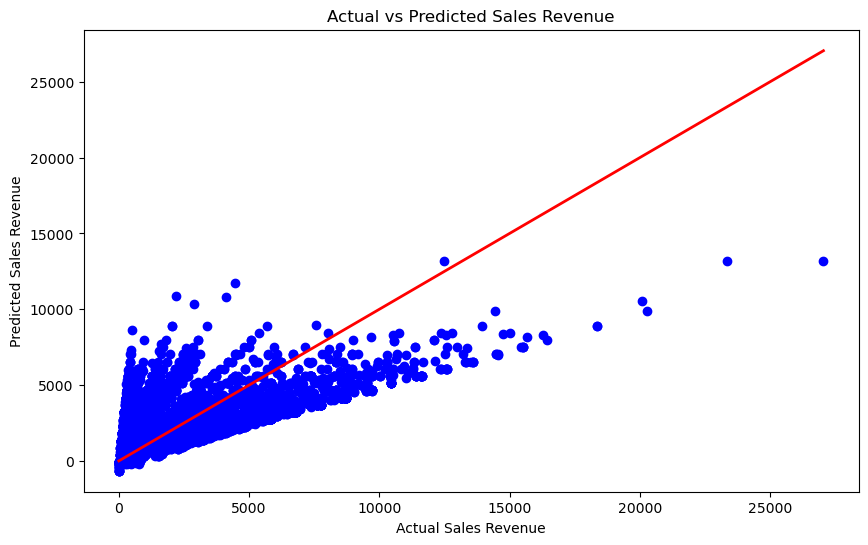

In [15]:
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['Units Sold', 'Discount Percentage', 'Marketing Spend (USD)']]
y = df['Sales Revenue (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted sales revenue
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Sales Revenue')
plt.xlabel('Actual Sales Revenue')
plt.ylabel('Predicted Sales Revenue')
plt.show()

This chart compares your **actual sales revenue** to the **predicted sales revenue** based on your sales model.

- **Red line**: Represents a perfect prediction—if all points were on this line, the model would be 100% accurate.
- **Blue points**: The actual vs predicted sales for each store. The closer these points are to the red line, the more accurate the model is.

What this tells you:
- For most stores with revenue under $10,000, the predictions are fairly accurate, though there’s some spread.
- For stores with higher actual sales (over $10,000), the predictions tend to underestimate, as many points fall below the red line.

Key takeaway: The model works well for stores with lower sales but starts to lose accuracy as sales increase. You may want to refine the model for high-revenue stores to better capture their performance.

 ## Time Series Forecasting

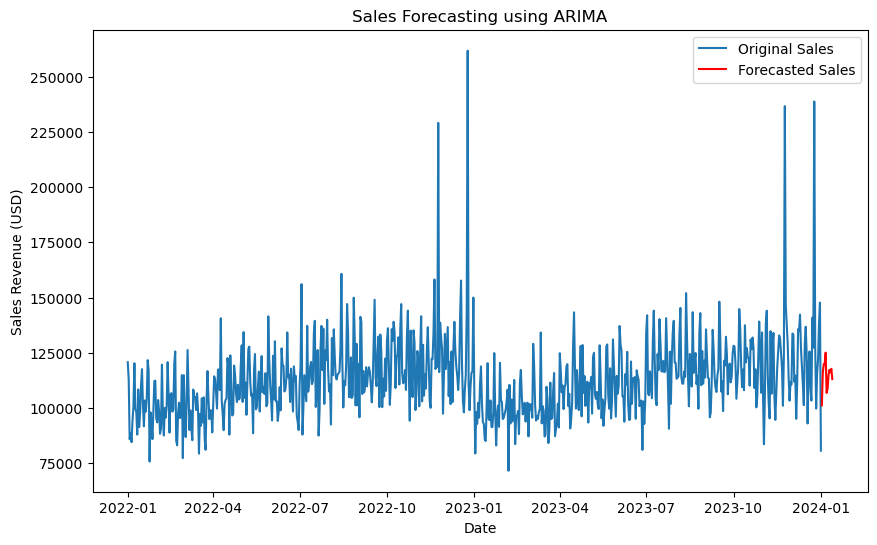

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Aggregate sales by date for time series forecasting
time_series_data = df.groupby('Date')['Sales Revenue (USD)'].sum()

# Fit ARIMA model
arima_model = ARIMA(time_series_data, order=(5, 1, 0))  # Adjust p, d, q as necessary
arima_result = arima_model.fit()

# Forecast the next 12 periods (e.g., months or weeks based on your data)
forecast = arima_result.forecast(steps=12)

# Plot the original sales and the forecast
plt.figure(figsize=(10,6))
plt.plot(time_series_data, label='Original Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Revenue (USD)')
plt.legend()
plt.show()


This chart uses **ARIMA (AutoRegressive Integrated Moving Average)** for sales forecasting. ARIMA is a popular time-series forecasting method that models patterns in historical data (like sales) to make future predictions. It works by combining three elements: 
- **AR (AutoRegressive)**: Captures how current sales relate to past sales.
- **I (Integrated)**: Accounts for trends over time.
- **MA (Moving Average)**: Handles the influence of past forecast errors.

### What you’re seeing:
- The **blue line** shows actual sales data from January 2022 to late 2023. It displays clear fluctuations, with occasional large spikes in sales (e.g., around early 2023) likely due to seasonal or promotional events.
- The **red line** represents the ARIMA model’s forecast, starting in late 2023. The forecast stays close to recent sales levels (around $125,000) but shows a slight dip in volatility, meaning it expects sales to remain stable in the near future.

### Why this analysis was done:
ARIMA helps predict future sales based on past patterns. This allows businesses to:
- Anticipate demand changes.
- Make data-driven decisions for inventory management, staffing, and marketing.
- Plan budgets by forecasting revenue more accurately.

The relatively stable forecast indicates no significant changes are expected in the short term, but the model's accuracy will improve with ongoing updates as more data is collected.

In [17]:
# Create sales growth feature (percent change in sales revenue)
df['Sales Growth'] = df['Sales Revenue (USD)'].pct_change()

# Encode the 'Day of the Week' column
df = pd.get_dummies(df, columns=['Day of the Week'], drop_first=True)

# Create lag features for Sales Revenue (e.g., past 1 day and 2 days)
df['Sales Lag 1'] = df['Sales Revenue (USD)'].shift(1)
df['Sales Lag 2'] = df['Sales Revenue (USD)'].shift(2)

# Drop rows with NaN values due to shifting
df.dropna(inplace=True)

# Display the updated DataFrame
df.head()


,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Holiday Effect,...,Cluster,Sales Growth,Day of the Week_Monday,Day of the Week_Saturday,Day of the Week_Sunday,Day of the Week_Thursday,Day of the Week_Tuesday,Day of the Week_Wednesday,Sales Lag 1,Sales Lag 2
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,False,...,0,-0.857143,True,False,False,False,False,False,2665.53,2741.69
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,False,...,0,3.000000,False,False,False,False,True,False,380.79,2665.53
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,False,...,0,-0.500000,False,False,False,False,False,True,1523.16,380.79
5,Spearsland,52372247,2022-01-06,8,3046.32,0,41,Bhutan,Furniture,False,...,0,3.000000,False,False,False,True,False,False,761.58,1523.16
6,Spearsland,52372247,2022-01-07,6,2284.74,0,0,Suriname,Furniture,False,...,0,-0.250000,False,False,False,False,False,False,3046.32,761.58


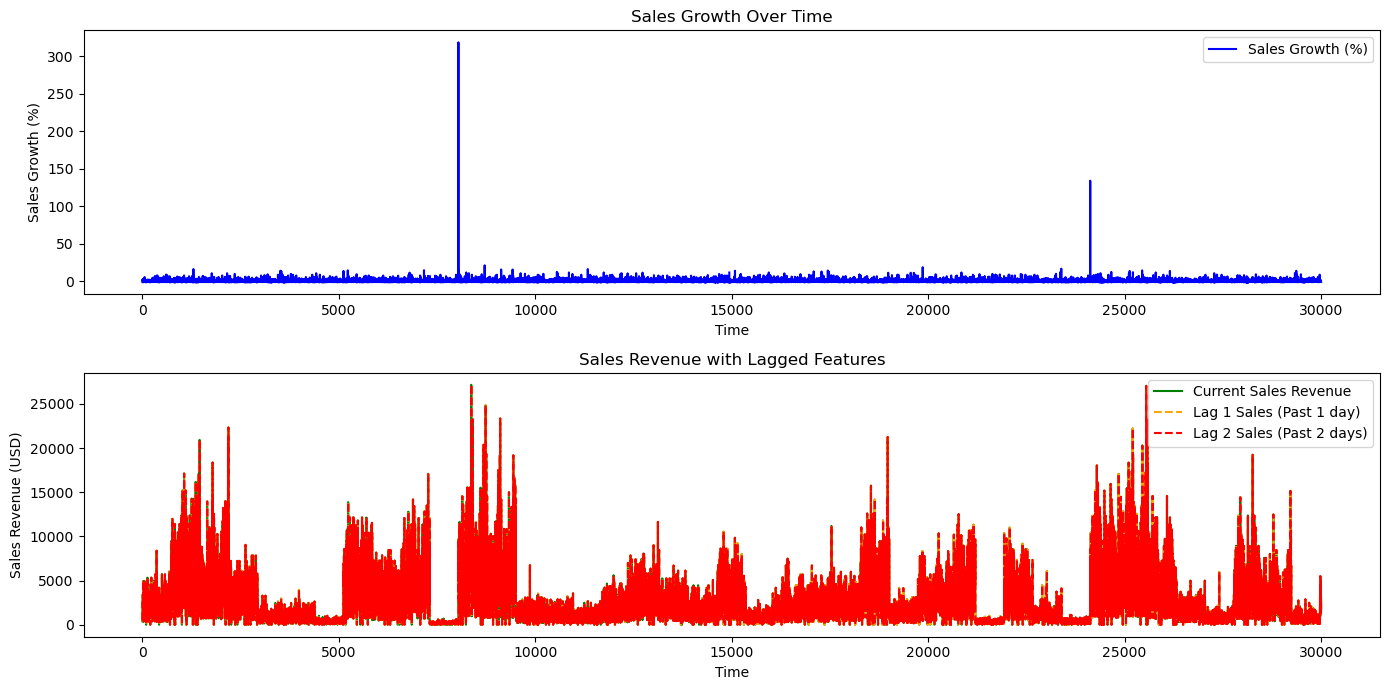

In [18]:
plt.figure(figsize=(14, 7))

# Plot Sales Growth over time
plt.subplot(2, 1, 1)
df['Sales Growth'].plot(color='blue', label='Sales Growth (%)')
plt.title('Sales Growth Over Time')
plt.ylabel('Sales Growth (%)')
plt.xlabel('Time')
plt.legend()

# Plot Sales Revenue with Lag 1 and Lag 2
plt.subplot(2, 1, 2)
plt.plot(df['Sales Revenue (USD)'], label='Current Sales Revenue', color='green')
plt.plot(df['Sales Lag 1'], label='Lag 1 Sales (Past 1 day)', linestyle='--', color='orange')
plt.plot(df['Sales Lag 2'], label='Lag 2 Sales (Past 2 days)', linestyle='--', color='red')
plt.title('Sales Revenue with Lagged Features')
plt.ylabel('Sales Revenue (USD)')
plt.xlabel('Time')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


### Analysis & Explanation:

- **Sales Growth Over Time:**
   This shows how your sales change day by day. Big jumps mean a boost in sales (maybe from promotions or special events), while drops suggest a slowdown. By spotting these patterns, you can figure out what’s driving your sales and adjust your strategy accordingly.

- **Sales Lagged Features:**
   This compares current sales to what you made in the previous days. If sales numbers from one day affect the next, it means past sales can help predict future trends. Understanding this can help you manage inventory and marketing more efficiently.

### What This Means for Your Business:

- **Sales Growth:** Tracking growth helps you spot trends — whether your sales are climbing or falling. Consistent drops might point to issues with customers or outside factors affecting your business.

- **Lag Features:** If sales from past days predict today’s performance, you can use that insight to plan better. For example, if strong Monday sales usually lead to strong Tuesday sales, you can stock and promote accordingly to maximize profits.